# Retail customer segmentation
The aim of this project is to conduct customer segmentation using a clustering algorithm. This will involve dividing a diverse customer base into smaller, homogeneous groups based on shared characteristics like demographics, behavior, or preferences. 

**Why?**

This strategy is invaluable as it enables businesses to tailor their marketing efforts, products, and services to each segment's specific needs and preferences. By doing so, companies can enhance customer satisfaction, loyalty, and profitability. Moreover, it allows for more efficient resource allocation, helping businesses focus their resources where they are most likely to yield the highest returns. Overall, customer segmentation empowers businesses to create more personalized and targeted experiences, ultimately driving better results and a competitive edge in the market.

# Scope

The dataset has been downloaded from [Kaggle](https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering) The data contains customer information collected from a mall's membership cards.

## About the data

The data is heterogenous, it contains both numerical and categorical variables. The features can be divided into the following four themes:

1. *People:*
* ***ID (nominal):*** Customer's unique identifier
* ***Year_birth (date):*** Birth year
* ***Education (nominal):*** Education level
* ***Marital_Status (nominal):*** Marital status
* ***Income (numerical):*** Annual household income
* ***Kidhome (numerical):*** No. of children in the household
* ***Teenhome (numerical):*** No. of teens in the household
* ***Dt_Customer (date):*** Date of customer's enrolment
* ***Recency (numerical):*** No. of days since last purchase
* ***Complain (nominal/boolean):*** Complained in the last 2 years (1/0 = yes/no)

2. *Products:*
* ***MntWines (numerical):*** Expenditure on wine in last 2 years
* ***MntFruits (numerical):*** Expenditure on fruits in the last 2 years
* ***MntMeatProducts (numerical):*** Expenditure on meat in the last 2 years
* ***MntFishProducts (numerical):*** Expenditure on fish in the last 2 years
* ***MntSweetProducts (numerical):*** Expenditure on sweets in the last 2 years
* ***MntGoldProds (numerical):*** Expenditure on gold in the last 2 years

3. *Promotion:*
* ***NumDealsPurchases (numerical):*** No. of purchases made with a discount
* ***AcceptedCmp1 (nominal/boolean):*** Accepted offer in the 1st campaign (1/0 = yes/no)
* ***AcceptedCmp2 (nominal/boolean):*** Accepted offer in the 2nd campaign (1/0 = yes/no)
* ***AcceptedCmp3 (nominal/boolean):*** Accepted offer in the 3rd campaign (1/0 = yes/no)
* ***AcceptedCmp4 (nominal/boolean):*** Accepted offer in the 4th campaign (1/0 = yes/no)
* ***AcceptedCmp5 (nominal/boolean):*** Accepted offer in the 5th campaign (1/0 = yes/no)
* ***Response (nominal/boolean):*** Accepted offer in the last campaign (1/0 = yes/no)

4. *Place:*
* ***NumWebPurchases (numerical):*** No. of purchases via website
* ***NumCataloguePurchases (numerical):*** No. of purchases via catalogue
* ***NumStorePurchases (numerical):*** No. of purchases in store
* ***NumWebVisitsMonth (numerical):*** No. of visits to website in the last month

## Dependencies

In [1]:
import sys
CONFIG_DIRECTORY = 'C:\\Users\\billy\\OneDrive\\Documents\\Python Scripts\\1. Portfolio\\retail-customer-segmentation\\retail-customer-segmentation'
if CONFIG_DIRECTORY not in sys.path:
    sys.path.insert(0, CONFIG_DIRECTORY)

import ast
import config
import datetime
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt
import warnings
plt.style.use('seaborn-v0_8-muted')

## Import data

In [2]:
clean_df = pd.read_csv(config.file_directory('cleaned') + 'cleaned_df.csv')
clean_df = clean_df.sort_index(axis=1, key=lambda col: col.str.lower())
print(f"Number of records: {clean_df.shape[0]}")
clean_df.head()

Number of records: 2205


,AcceptedCmp1,AcceptedCmp5,Age,Education,Income,is_parent,Marital_Status,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,total_spend
0,False,False,64,Graduation,58138.0,False,Single,10,3,4,8,7,1617
1,False,False,67,Graduation,46344.0,True,Single,1,2,2,1,5,27
2,False,False,56,Graduation,71613.0,False,Together,2,1,10,8,4,776
3,False,False,37,Graduation,26646.0,False,Together,0,2,4,2,6,53
4,False,False,40,Postgraduate,58293.0,False,Married,3,5,6,5,5,422


In [3]:
kmeans_df = pd.read_csv(config.file_directory('cleaned') + 'kmeans_df.csv')
print(f"Number of records: {kmeans_df.shape[0]}")
kmeans_df.head(3)

Number of records: 2205


,Age_qt,Education_Basic,Education_Graduation,Education_Postgraduate,Income_qt,is_parent,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,NumCatalogPurchases_qt,NumDealsPurchases_qt,NumStorePurchases_qt,NumWebPurchases_qt,NumWebVisitsMonth_qt,total_spend_qt
0,0.849874,0,1,0,0.242594,0,0,0,1,0,0,2.043115,0.653377,-0.257495,1.295363,0.573115,1.399563
1,1.123415,0,1,0,-0.182928,1,0,0,1,0,0,-0.329548,0.163824,-1.571286,-1.280981,-0.213636,-1.479004
2,0.341493,0,1,0,0.833627,0,0,0,0,1,0,0.108103,-0.718462,1.040090,1.295363,-0.514923,0.370194


In [4]:
kproto_df = pd.read_csv(config.file_directory('cleaned') + 'kproto_df.csv')
print(f"Number of records: {kproto_df.shape[0]}")
kproto_df.head(3)

Number of records: 2205


,Age_qt,Education,Income_qt,is_parent,Marital_Status,NumCatalogPurchases_qt,NumDealsPurchases_qt,NumStorePurchases_qt,NumWebPurchases_qt,NumWebVisitsMonth_qt,total_spend_qt
0,0.849874,Graduation,0.242594,False,Single,2.043115,0.653377,-0.257495,1.295363,0.573115,1.399563
1,1.123415,Graduation,-0.182928,True,Single,-0.329548,0.163824,-1.571286,-1.280981,-0.213636,-1.479004
2,0.341493,Graduation,0.833627,False,Together,0.108103,-0.718462,1.040090,1.295363,-0.514923,0.370194


## Model selection 

### K-means

* Centroid based clustering where data is divided into *k* clusters.

* This is achieved by minimising the sum of the squared distances of each record to the mean of its assigned cluster.

* Objective function:

<center> $ TWSS = \sum_{k=1}^k \sum_{i\in C_k} \lvert \lvert x^{(i)} - \mu_c^{(k)} \lvert \lvert ^2 $ </center>

<center><i> Where, TWSS = total within-cluster sum of squared errors, x<sub>i</sub> is the ith data point in cluster k and &#956;<sub>c</sub><sup>(k)</sup> is the center of cluster k </i></center>

#### Optimisation

* The optimum number of clusters will be estimated using an elbow plot. 
  
* This involved plotting the average within-cluster squared distance of points to the relevant cluster centroid. The optimial number of clusters was chosen at the "elbow" of the plot, where improvements in the metric begin to diminish.

***Key observation***

* The elbow of the plot is roughly at 4 clusters. This suggests, four clusters explain a lot of variation in the data.

In [5]:
from sklearn.cluster import KMeans
inertia = []
for n_clusters in range(2, 14):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=300).fit(kmeans_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})

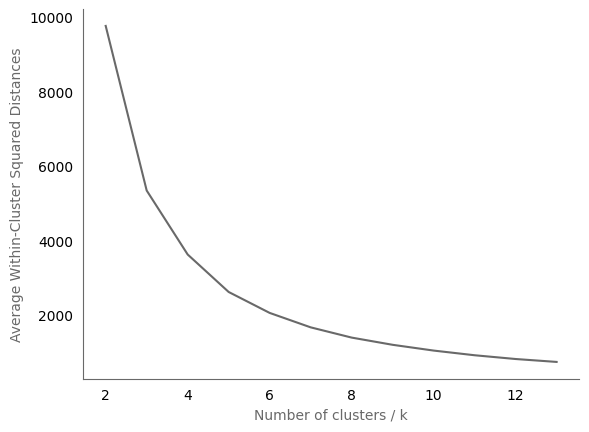

In [6]:
fig, axes = plt.subplots()
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')

axes.plot(inertias['n_clusters'], inertias['inertia'], color='dimgray')
axes.set_xlabel('Number of clusters / k', color='dimgray')
axes.set_ylabel('Average Within-Cluster Squared Distances', color='dimgray');

#### Evaluation
* The model is retrained with the number of clusters set to four. The algorithm is run with different centroid seeds 300 times. By default, the model with the lowest TWSS is output.

In [7]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0, init='random', n_init=300).fit(kmeans_df)

##### Cluster cardinality & magnitude
* Before evaluating clusters in terms of the constituent features, cluster cardinality and magnitude are assessed.

***Key observations***

* Clusters 0, 2 and 3 are roughly equal in size. However, cluster 1 is substantially smaller. 

* Cluster magnitude scales linearly with cardinality. This suggests cluster 1 may be smaller due to non-uniform density of points rather than outliers. A lower density of points in cluster 1 would lead to reduced cardinality relative to other clusters.

In [8]:
from scipy.spatial.distance import euclidean

# Cluster cardinality
kmeans_labels = pd.DataFrame(np.transpose(kmeans.labels_), columns=["labels"])
kmeans_cardinality = kmeans_labels["labels"].value_counts().sort_index()

# Cluster magnitude
data = pd.DataFrame.from_records(np.expand_dims(kmeans_df, axis=1), columns=["point"])
data["label"] = kmeans.labels_
data["center"] = data["label"].apply(lambda label: kmeans.cluster_centers_[label])
data["distance"] = data.apply(lambda row: euclidean(row["point"], row["center"]), axis=1)
kmeans_magnitude = data.groupby(["label"])["distance"].sum()

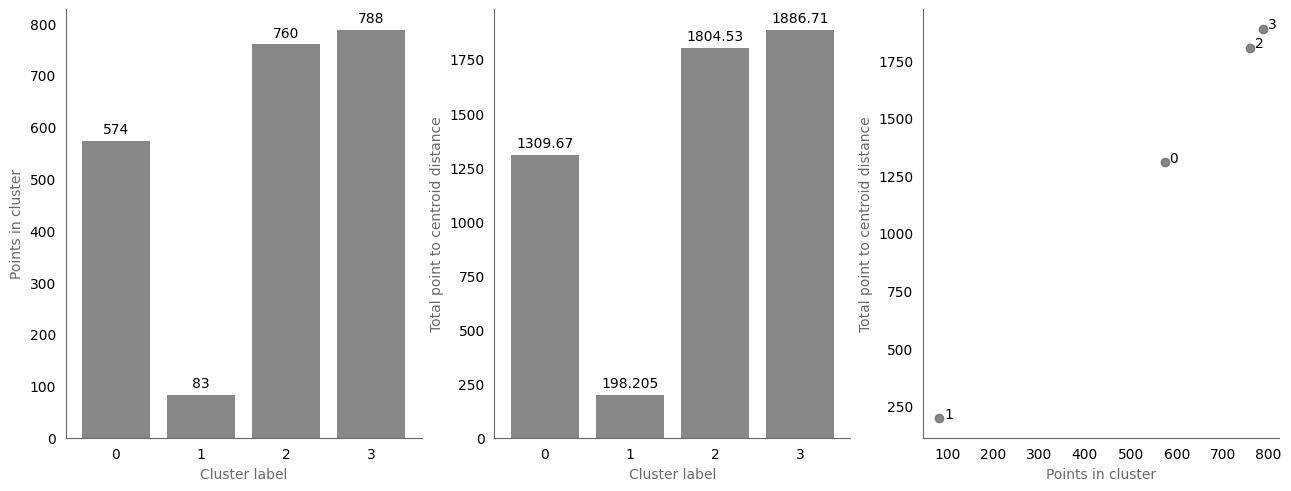

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(6.4*2, 4.8), constrained_layout=True)
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

# Cluster cardinality bar chart
cardinality_bars = axes[0].bar(kmeans_cardinality.index, kmeans_cardinality.values, color='dimgray', alpha=0.8)
axes[0].set_xlabel('Cluster label', color='dimgray')
axes[0].set_ylabel('Points in cluster', color='dimgray')
axes[0].bar_label(cardinality_bars, padding=3)

# Cluster magnitude bar chart
magnitude_bars = axes[1].bar(kmeans_magnitude.index, kmeans_magnitude.values, color='dimgray', alpha=0.8)
axes[1].set_xlabel('Cluster label', color='dimgray')
axes[1].set_ylabel('Total point to centroid distance', color='dimgray')
axes[1].bar_label(magnitude_bars, padding=3)

# Cardinality vs magnitude
axes[2].scatter(kmeans_cardinality.values, kmeans_magnitude.values, color='dimgray', alpha=0.8)
axes[2].set_xlabel('Points in cluster', color='dimgray')
axes[2].set_ylabel('Total point to centroid distance', color='dimgray')
i=0
for x, y in zip(kmeans_cardinality, kmeans_magnitude):
    axes[2].annotate(i, (x + 10, y))
    i+=1

##### Visual check of clusters

* Cluster centers displayed below. These show the average feature value for each cluster.

* A matrix of scatter plots was constructed with the goal of evaluating general cluster characteristics. It is difficult to interpret.

* A series of bar plots showing the mean value of each feature for each cluster was also plotted. The mean value of each feature is equivalent to the cluster center.

***Key observations***

Clusters appear to have the following characteristics:

* Cluster 0 = Below average spend. Below average age and income. Low spend reflected in below average no. of catalogue, store and web purchases. Despite low spend, above average no. of web visits. May have a child. 

* Cluster 1 = Above average spend. Above average age and income. High spend reflected in above average no. of catalogue, store and web purchases and below average no. of purchases via deals. Doesn't have a child.

* Cluster 2 = Above average spend (highest). Above average age and income. High spend reflected in above average no. of catalogue, store and web purchases and below average no. of purchases via deals. May have child. 

* Cluster 3 = Below average spend. Above average age but below average income. Low spend reflected in below average no. of store and catalogue purchases and above average (highest) no. of purchases via deals. May have a child.

In [10]:
kmeans_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=list(kmeans_df.columns))
display(kmeans_centers_df.head())

,Age_qt,Education_Basic,Education_Graduation,Education_Postgraduate,Income_qt,is_parent,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,NumCatalogPurchases_qt,NumDealsPurchases_qt,NumStorePurchases_qt,NumWebPurchases_qt,NumWebVisitsMonth_qt,total_spend_qt
0,-0.296579,5.749129e-02,0.496516,0.445993,-0.884985,0.280488,0.106272,0.407666,0.210801,0.257840,0.017422,-5.199338,-0.302784,-0.905512,-1.097799,0.547689,-1.152409
1,0.335634,-3.469447e-18,0.493976,0.506024,0.877687,0.012048,0.132530,0.433735,0.132530,0.240964,0.060241,0.934228,-0.421260,5.199338,0.583883,-0.750978,0.893991
2,0.124106,0.000000e+00,0.546053,0.453947,0.949737,0.032895,0.106579,0.375000,0.223684,0.255263,0.039474,0.902699,-0.445894,0.668521,0.568881,-0.782368,0.945502
3,0.058615,2.664975e-02,0.472081,0.501269,-0.364108,0.288071,0.098985,0.383249,0.213198,0.265228,0.039340,-0.051718,0.656433,-0.230397,0.041322,0.408137,-0.163468


In [11]:
kmeans_df['cluster'] = kmeans.labels_

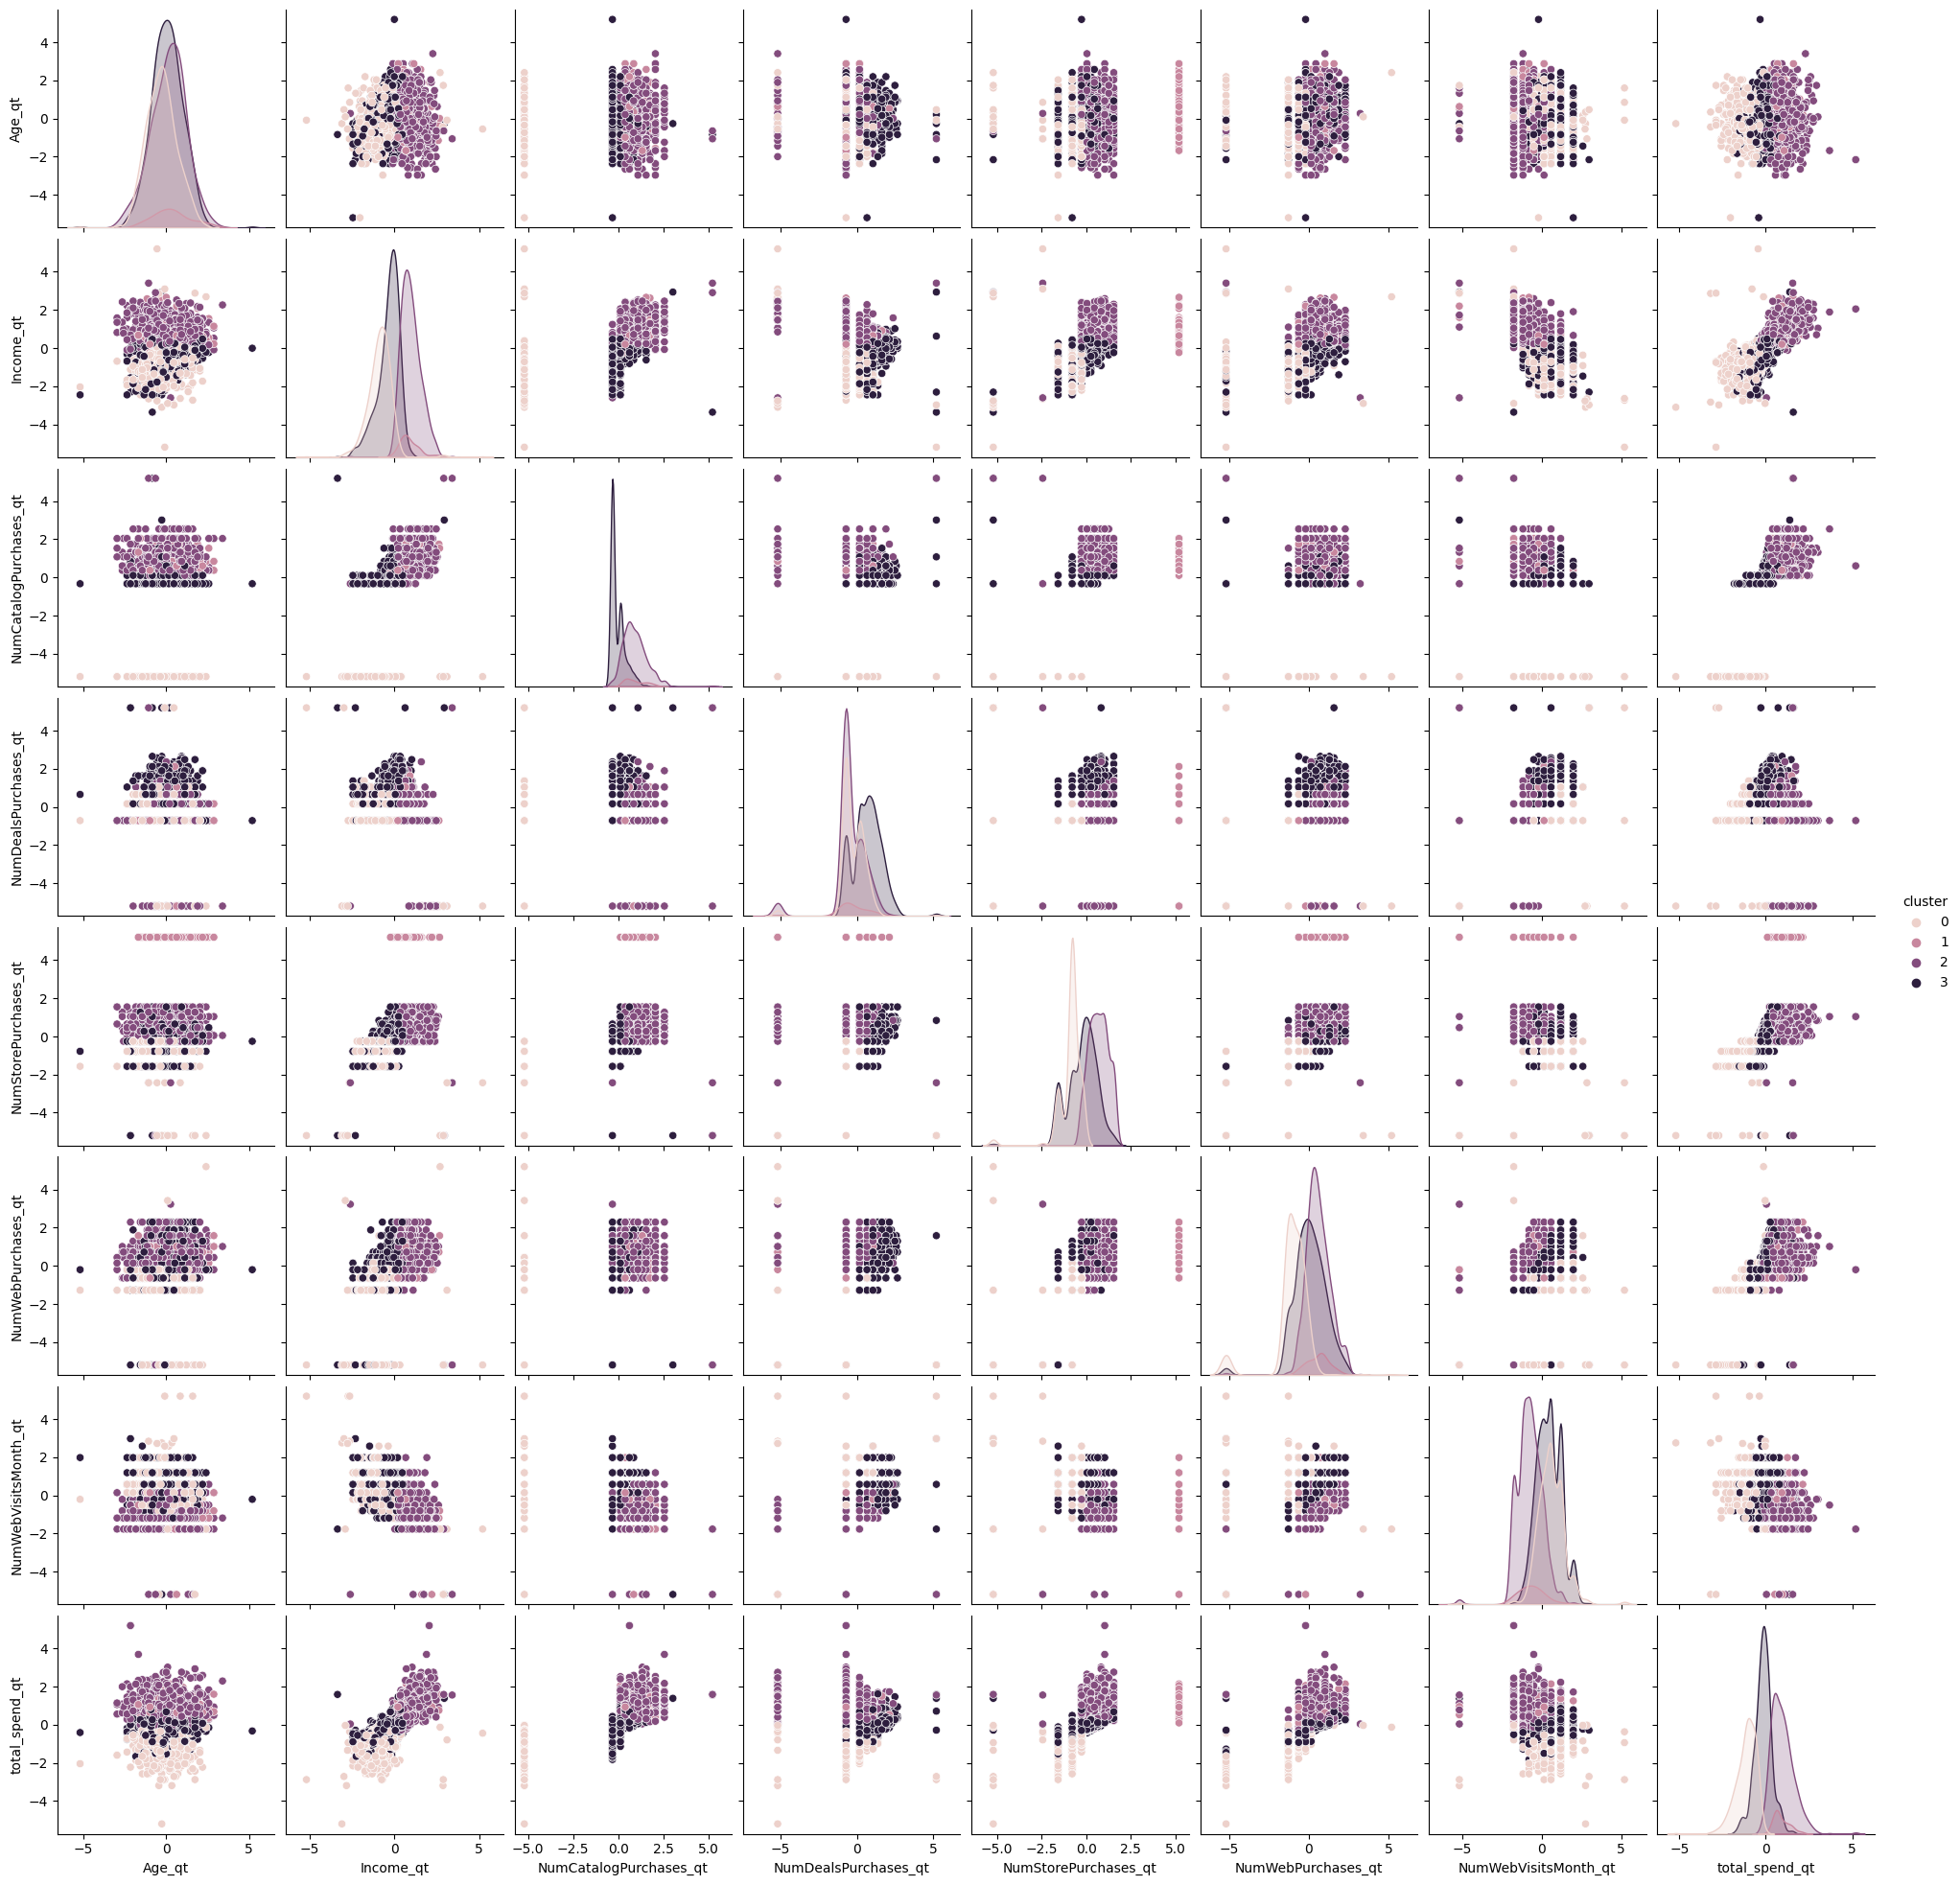

In [12]:
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
qt_cols = list(kmeans_df.filter(regex='_qt',axis=1).columns)
qt_cols.append('cluster')
sns.pairplot(kmeans_df.loc[:, qt_cols], hue='cluster')

C:\Users\billy\AppData\Local\Temp\ipykernel_13648\4091058668.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(kmeans_centers_df.columns), rotation=80);


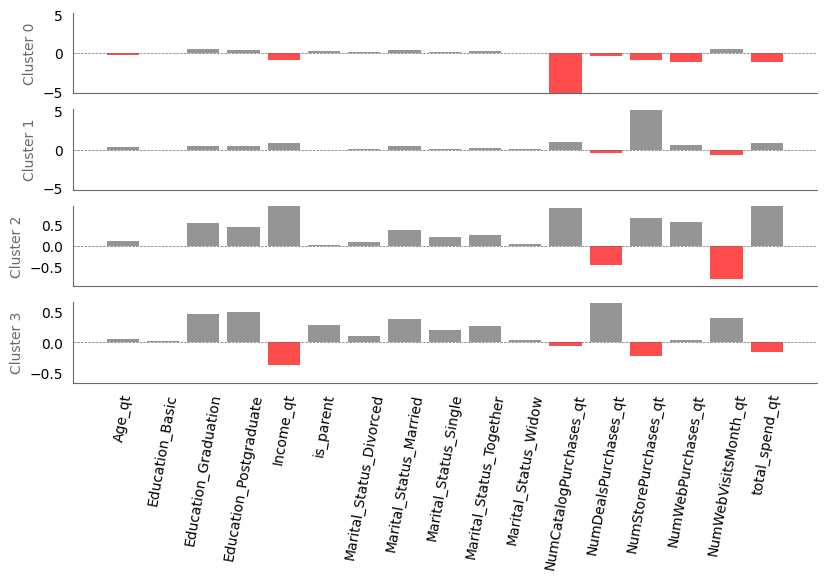

In [13]:
fig, axes = plt.subplots(k, 1, figsize=(6.4*1.5, 4.8), sharex=True)
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for i, ax in enumerate(axes):
    X = kmeans_centers_df.loc[i, :].index
    Y = kmeans_centers_df.loc[i, :]
    colors = ['dimgray' if y > 0 else 'red' for y in Y]
    ylim = 1.01 * np.max(np.abs(Y))
    ax.bar(X, Y, color=colors, alpha=0.7)
    ax.axhline(color='dimgray', linestyle='--', linewidth=0.5)
    ax.set_ylabel(f'Cluster {i}', color='dimgray')
    ax.set_ylim(-ylim, ylim)
ax.set_xticklabels(list(kmeans_centers_df.columns), rotation=80);

#### Profile

* Clustered bar charts were plotted for the original categorical feature. These were used to compare the proportion of points in each cluster associated with different categories.

* Box plots, split by cluster are displayed for the original numerical features. These were used to compare the frequency distributions between each cluster.

***Key observations***

As expected from the above analysis, clusters have the following characteristics:

* Cluster 0 = Below average spend. Below average age and income. Low spend reflected in below average no. of catalogue, store and web purchases. Despite low spend, above average no. of web visits. May have a child. 

* Cluster 1 = Above average spend. Above average age and income. High spend reflected in above average no. of catalogue, store and web purchases and below average no. of purchases via deals. Doesn't have a child.

* Cluster 2 = Above average spend (highest). Above average age and income. High spend reflected in above average no. of catalogue, store and web purchases and below average no. of purchases via deals. May have child. 

* Cluster 3 = Below average spend. Above average age but below average income. Low spend reflected in below average no. of store and catalogue purchases and above average (highest) no. of purchases via deals. May have a child.

In [14]:
clean_df['kmeans_cluster'] = kmeans.labels_

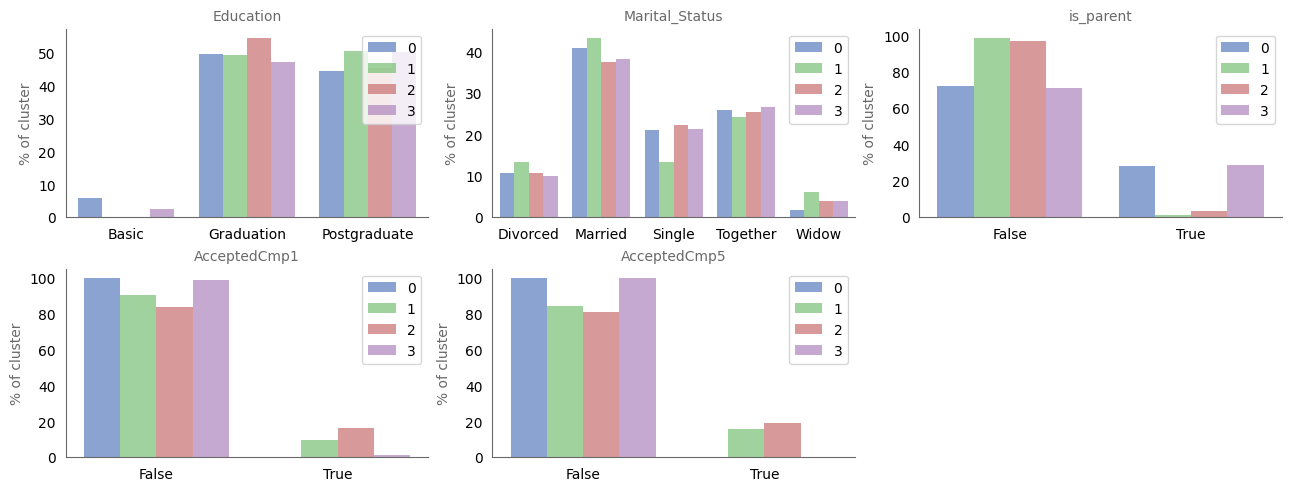

In [15]:
cat_cols = ['Education', 'Marital_Status', 'is_parent', 'AcceptedCmp1', 'AcceptedCmp5']
fig, axes = plt.subplots(2, 3, figsize=(6.4*2, 4.8), constrained_layout=True)
axes = axes.flatten()
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for ax, col in zip(axes, cat_cols):
    data = clean_df.groupby(['kmeans_cluster', col])['kmeans_cluster'].count() / clean_df.groupby(['kmeans_cluster'])['kmeans_cluster'].count() * 100
    data.rename('perc', inplace=True)
    data = data.reset_index()
    data[['kmeans_cluster', col]] = data[['kmeans_cluster', col]].astype(str)
    sns.barplot(x=col, y='perc', hue='kmeans_cluster', data=data, ax=ax, alpha=0.7)
    ax.set_xlabel('')
    ax.set_ylabel('% of cluster', color='dimgray', size=10)
    ax.set_title(col, color='dimgray', size=10)
    ax.legend(loc='upper right')
fig.delaxes(axes[5])

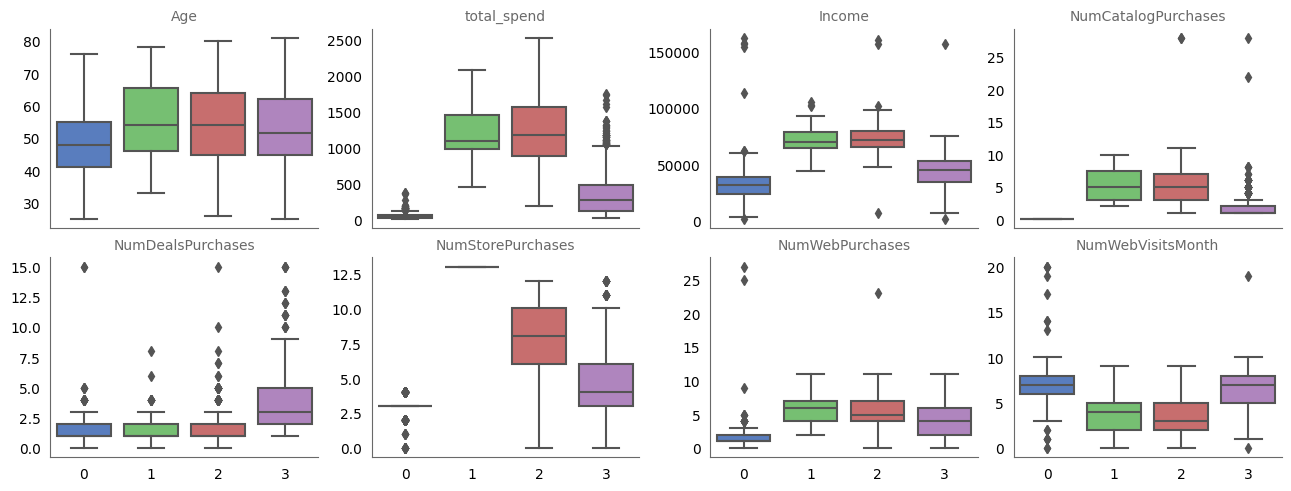

In [16]:
num_cols = ['Age', 'total_spend', 'Income', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']
fig, axes = plt.subplots(2, 4, figsize=(6.4*2, 4.8), constrained_layout=True, sharex=True)
axes = axes.flatten()
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for ax, col in zip(axes, num_cols):
    sns.boxplot(data=clean_df, x='kmeans_cluster', y=col, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(col, color='dimgray', size=10)

### K-prototypes
* K-means is limited to numeric data. K-prototypes generalises the algorithm to mixed datasets (i.e containing numeric and categoric attributes).

* The algorithm was first report [here](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.15.4028&rep=rep1&type=pdf).

**How?**

* It integrates the k-means and k-modes algorithms when measuring distance between an object X<sub>i</sub> and cluster C<sub>j</sub>.

* Similar to k-means, for the numeric attributes the measure of distance d(X<sub>i</sub>, C<sub>j</sub>) is squared Euclidian distance. Whilst for the categoric attributes, the measure d<sub>r</sub>(X<sub>i</sub>, c<sub>j</sub>) is the number of matching attributes between the object and the cluster. Crucially the latter is 0 when x<sub>il</sub>=c<sub>jl</sub> and 1 when c<sub>il</sub> ≠ c<sub>jl</sub>.

<center> $ d(X_i,C_j) = d_r(X_i,C_j) + \gamma d_c(X_i,C_j) $ </center>
<center>Where, d(X<sub>i</sub>, C<sub>j</sub>) is the distance between object X<sub>i</sub> and cluster C<sub>j</sub> &Upsilon; is a weight for categorical attributes. </center>
<br>
<center> $ d_r(X_i,C_j) = \sum_{l=1}^p \lvert \lvert x_{il} - c_{jl} \lvert \lvert ^2  $ </center>
<center>Where, d<sub>r</sub>(X<sub>i</sub>, C<sub>j</sub>) is the distance between p numerical attributes</center>
<br>
<center> $ d_j(X_i,C_j) = \sum_{l=P+1}^m \delta (x_{il}, c_{jl}) $ </center>
<center>Where, d<sub>j</sub>(X<sub>i</sub>, C<sub>j</sub>) is the distance between m-p categorical attributes. </center>

#### Optimisation
* The optimum number of clusters will be estimated using an elbow plot. 
  
* This involved plotting the average within-cluster cost. The optimial number of clusters was chosen at the "elbow" of the plot, where improvements in the metric begin to diminish.

***Key observation***

* The elbow of the plot is roughly at 5 clusters. This suggests, five clusters explain a lot of variation in the data.

In [17]:
cat_cols = list(kproto_df.select_dtypes(['object','bool']).columns)
cat_cols_pos = [kproto_df.columns.get_loc(col) for col in cat_cols]
print(f"Categorical columns: {cat_cols}")
print(f"Categorical columns position  : {cat_cols_pos}")

Categorical columns: ['Education', 'is_parent', 'Marital_Status']
Categorical columns position  : [1, 3, 4]


In [18]:
from kmodes.kprototypes import KPrototypes
cost = []
for n_clusters in range(2, 14):
    kprototype = KPrototypes(n_clusters=n_clusters, random_state=0, n_init=10)
    kprototype.fit_predict(kproto_df.to_numpy(), categorical=cat_cols_pos)
    cost.append(kprototype.cost_ / n_clusters)
costs = pd.DataFrame({'n_clusters': range(2, 14), 'cost': cost})

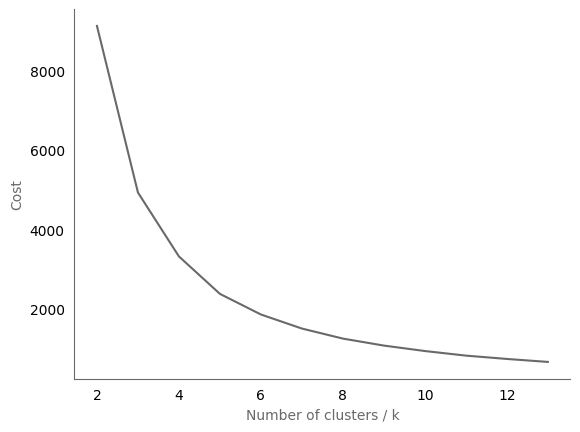

In [19]:
fig, axes = plt.subplots()
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')

axes.plot(costs['n_clusters'], costs['cost'], color='dimgray')
axes.set_xlabel('Number of clusters / k', color='dimgray')
axes.set_ylabel('Cost', color='dimgray');

#### Evaluation

In [34]:
k = 4
kprototype = KPrototypes(n_clusters=k, random_state=0, n_init=25)
kprototype.fit_predict(kproto_df.to_numpy(), categorical=cat_cols_pos)
kproto_df['cluster'] = kprototype.labels_ # Add cluster label to the dataframe

##### Cluster cardinality
* Before evaluating clusters in terms of the constituent features, cluster cardinality is assessed.

***Key observations***
* Cluster size is more even than for k-means

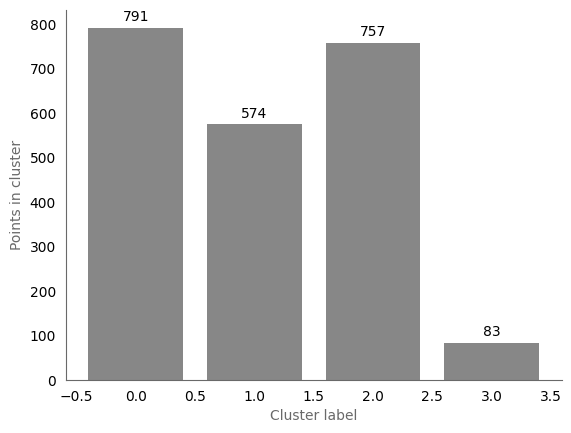

In [35]:
kproto_labels = pd.DataFrame(np.transpose(kprototype.labels_), columns=["labels"])
kproto_cardinality = kproto_labels["labels"].value_counts().sort_index()

fig, axes = plt.subplots(1, 1, figsize=(6.4, 4.8))
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')
cardinality_bars = axes.bar(kproto_cardinality.index, kproto_cardinality.values, color='dimgray', alpha=0.8)
axes.set_xlabel('Cluster label', color='dimgray')
axes.set_ylabel('Points in cluster', color='dimgray')
axes.bar_label(cardinality_bars, padding=3);

##### Visual check of clusters

* Cluster centers are displayed below. For numeric features, these show the average feature value for each cluster. For categorical features, these show the mode for each cluster.

* A matrix of scatter plots was constructed with the goal of evaluating general cluster characteristics. It is difficult to interpret.

* A series of bar plots showing the mean value of each feature for each cluster was also plotted. The mean value of each feature is equivalent to the cluster center.

***Key observations***

Clusters appear to have the following characteristics:

* Cluster 0 = Below average spend (lowest), income (lowest) and age (lowest). Above average no. of deal purchases. Below average no. of catalogue, store and web purchases. Despite low spend, above average no. of web visits (highest). Unlikely to be a parent. 

* Cluster 1 = Below average spend (just) and income. Above average age (highest). Above average no. of deal purchases (highest). Roughly average no. of store and catalogue purchases. Above average no. of web site visits and purchases. More likely to be a parent.

* Cluster 2 = Below average spend, age and income. Below average number of deal purchases. Below average no. of catalogue (lowest), store and web purchases. Despite low spend, above average no. of web visit. Unlikely to be a parent. 

* Cluster 3 = Above average spend (highest), income (highest) and age. Below average no. of deal purchases (lowest). Above average catalogue (highest), web (highest) and store (highest) purchases. Unlikely to have a child.

In [36]:
kproto_centers_df = kproto_df.groupby('cluster').agg({
    # 'AcceptedCmp1': lambda x: x.value_counts().index[0],
    # 'AcceptedCmp5': lambda x: x.value_counts().index[0],
    'Age_qt': 'mean',
    'Education': lambda x: x.value_counts().index[0],
    'Income_qt': 'mean',
    'is_parent': lambda x: x.value_counts().index[0],
    'Marital_Status': lambda x: x.value_counts().index[0],
    'NumCatalogPurchases_qt': 'mean',
    'NumDealsPurchases_qt': 'mean',
    'NumStorePurchases_qt': 'mean',
    'NumWebPurchases_qt': 'mean',
    'NumWebVisitsMonth_qt': 'mean',
    'total_spend_qt': 'mean'}
)
display(kproto_centers_df.head())

,Age_qt,Education,Income_qt,is_parent,Marital_Status,NumCatalogPurchases_qt,NumDealsPurchases_qt,NumStorePurchases_qt,NumWebPurchases_qt,NumWebVisitsMonth_qt,total_spend_qt
cluster,,,,,,,,,,,
0,0.062132,Postgraduate,-0.364730,False,Married,-0.048073,0.650150,-0.227275,0.040054,0.404229,-0.161902
1,-0.296579,Graduation,-0.884985,False,Married,-5.199338,-0.302784,-0.905512,-1.097799,0.547689,-1.152409
2,0.120690,Graduation,0.955593,False,Married,0.902673,-0.443697,0.668822,0.572297,-0.783003,0.948260
3,0.335634,Postgraduate,0.877687,False,Married,0.934228,-0.421260,5.199338,0.583883,-0.750978,0.893991


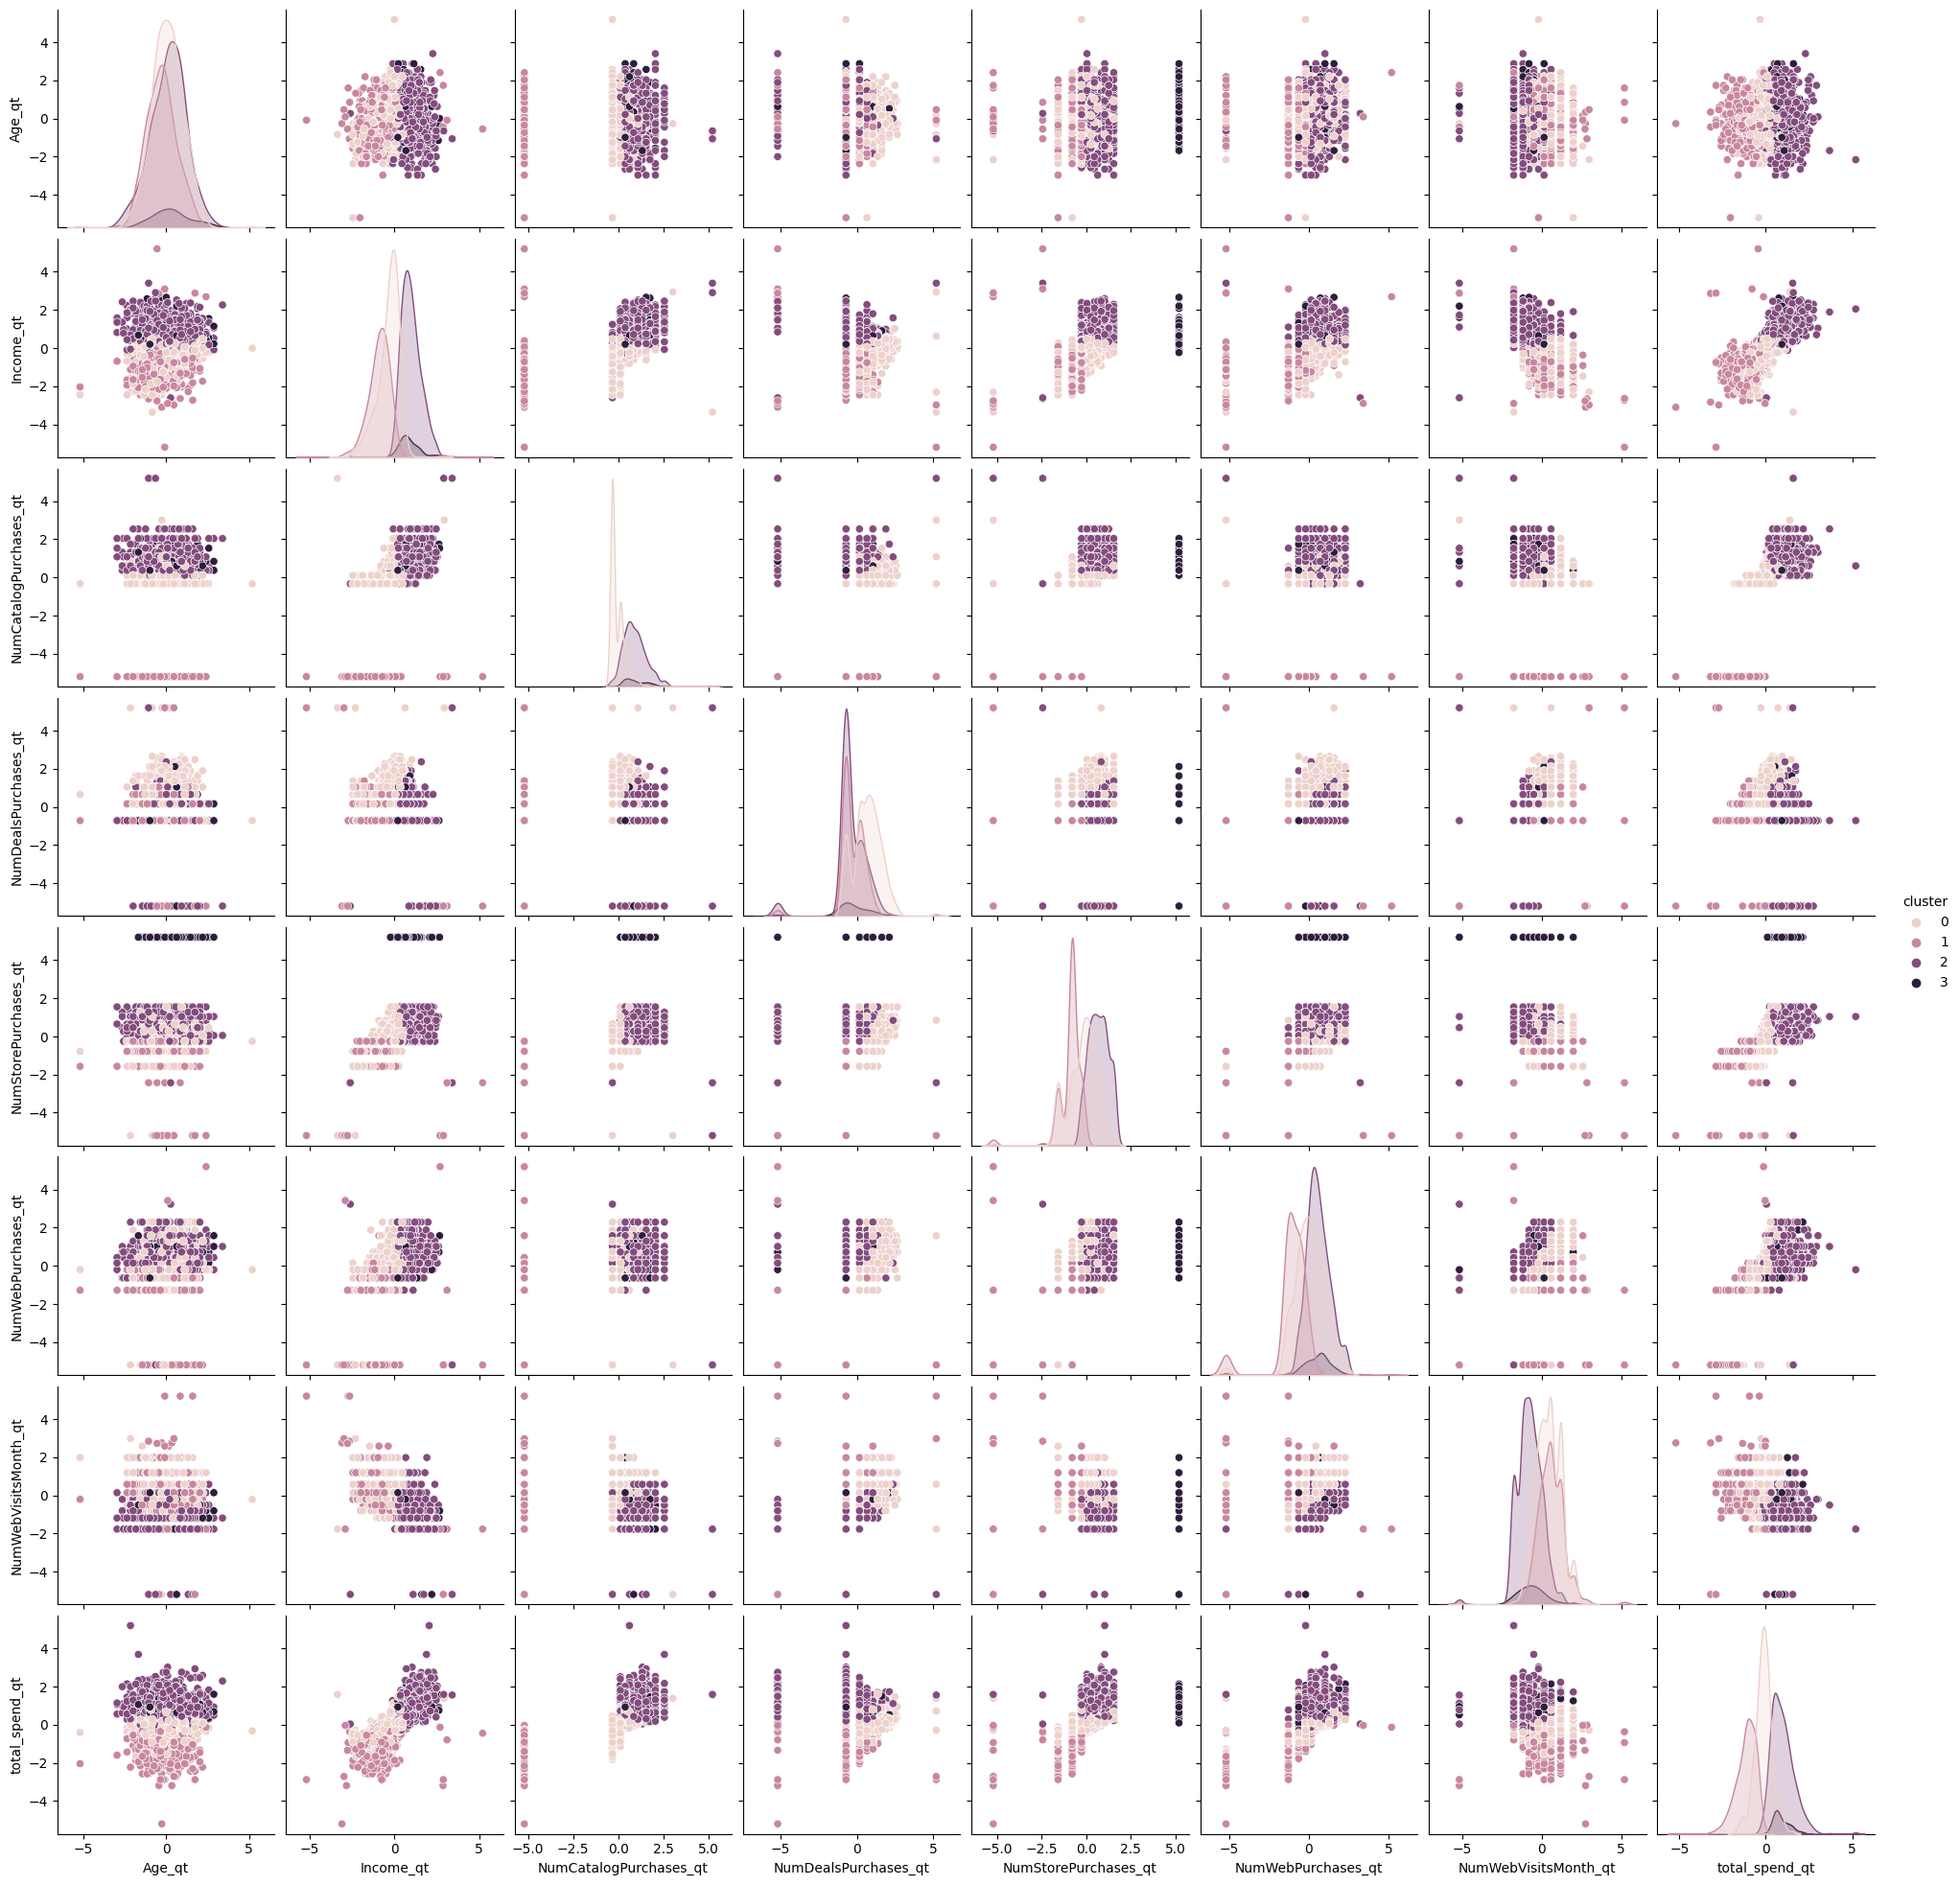

In [37]:
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
qt_cols = list(kproto_df.filter(regex='_qt',axis=1).columns)
qt_cols.append('cluster')
sns.pairplot(kproto_df.loc[:, qt_cols], hue='cluster')

C:\Users\billy\AppData\Local\Temp\ipykernel_13648\791938307.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(num_cols, rotation=70);


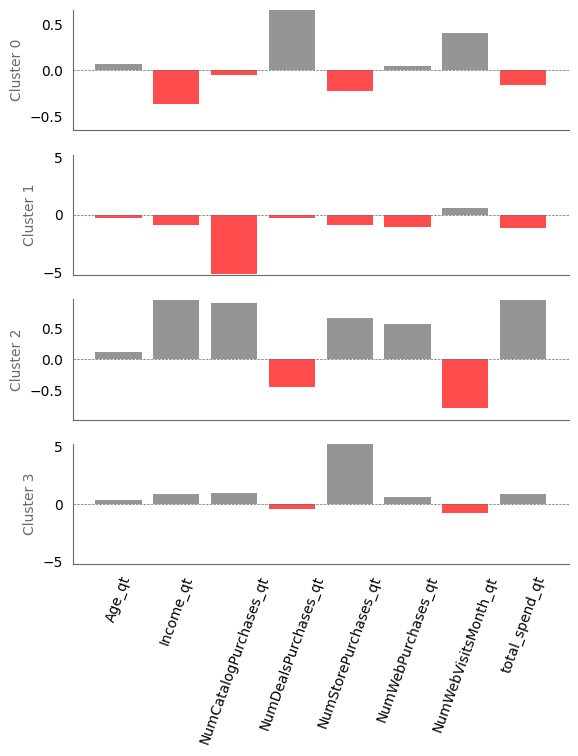

In [38]:
fig, axes = plt.subplots(k, 1, figsize=(6.4, 4.8*1.5), sharex=True)
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for i, ax in enumerate(axes):
    num_cols = list(kproto_centers_df.select_dtypes(['number']).columns)
    X = kproto_centers_df.loc[i, num_cols].index
    Y = kproto_centers_df.loc[i, num_cols]
    colors = ['dimgray' if y > 0 else 'red' for y in Y]
    ylim = 1.01 * np.max(np.abs(Y))
    ax.bar(X, Y, color=colors, alpha=0.7)
    ax.axhline(color='dimgray', linestyle='--', linewidth=0.5)
    ax.set_ylabel(f'Cluster {i}', color='dimgray')
    ax.set_ylim(-ylim, ylim)
ax.set_xticklabels(num_cols, rotation=70);

#### Profile
* Clustered bar charts were plotted for the original categorical feature. These were used to compare the proportion of points in each cluster associated with different categories.

* Box plots, split by cluster are displayed for the original numerical features. These were used to compare the frequency distributions between each cluster.

***Key observations***

* The clustered bar chart for is_parent shows more distinct differences between clusters (with respect to the k-means algorithm).

Clusters appear to have the following characteristics:

* Cluster 0 = Below average spend (lowest), income (lowest) and age (lowest). Above average no. of deal purchases. Below average no. of catalogue, store and web purchases. Despite low spend, above average no. of web visits (highest). Unlikely to be a parent. 

* Cluster 1 = Below average spend (just) and income. Above average age (highest). Above average no. of deal purchases (highest). Roughly average no. of store and catalogue purchases. Above average no. of web site visits and purchases. More likely to be a parent.

* Cluster 2 = Below average spend, age and income. Below average number of deal purchases. Below average no. of catalogue (lowest), store and web purchases. Despite low spend, above average no. of web visit. Unlikely to be a parent. 

* Cluster 3 = Above average spend (highest), income (highest) and age. Below average no. of deal purchases (lowest). Above average catalogue (highest), web (highest) and store (highest) purchases. Unlikely to be a parent.

In [42]:
clean_df['kproto_cluster'] = kprototype.labels_

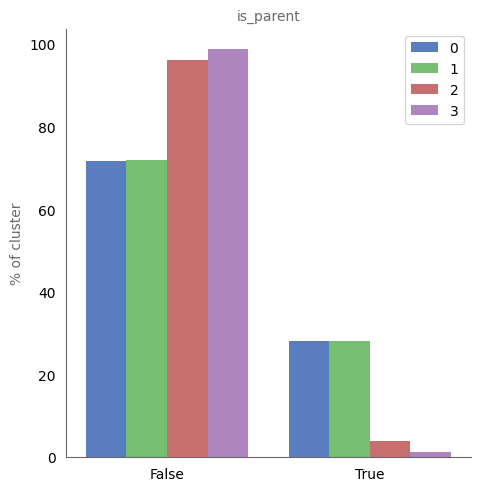

In [43]:
cat_cols = ['is_parent',] # 'Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp5']
fig, axes = plt.subplots(1, 3, figsize=(6.4*2, 4.8), constrained_layout=True)
axes = axes.flatten()
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for ax, col in zip(axes, cat_cols):
    data = clean_df.groupby(['kproto_cluster', col])['kproto_cluster'].count() / clean_df.groupby(['kproto_cluster'])['kproto_cluster'].count() * 100
    data.rename('perc', inplace=True)
    data = data.reset_index()
    data[['kproto_cluster', col]] = data[['kproto_cluster', col]].astype(str)
    sns.barplot(x=col, y='perc', hue='kproto_cluster', data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('% of cluster', color='dimgray', size=10)
    ax.set_title(col, color='dimgray', size=10)
    ax.legend(loc='upper right')
fig.delaxes(axes[1])
fig.delaxes(axes[2])
plt.savefig('figures/kprototypes_is_parent_by_cluster.png')

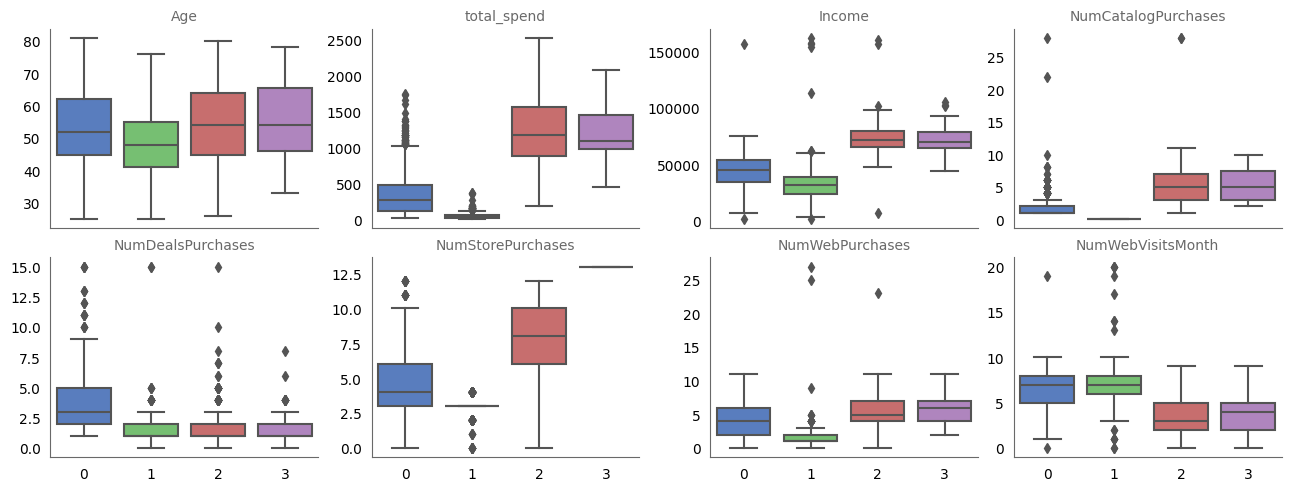

In [41]:
num_cols = ['Age', 'total_spend', 'Income', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']
fig, axes = plt.subplots(2, 4, figsize=(6.4*2, 4.8), constrained_layout=True, sharex=True)
axes = axes.flatten()
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for ax, col in zip(axes, num_cols):
    sns.boxplot(data=clean_df, x='kproto_cluster', y=col, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(col, color='dimgray', size=10)
plt.savefig('figures/kprototypes_numeric_attributes_by_cluster.png')

### Hierarchical clustering

* https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
* https://bpostance.github.io/posts/clustering-mixed-data/
* https://medium.com/analytics-vidhya/gowers-distance-899f9c4bd553
* https://stats.stackexchange.com/questions/395037/clustering-data-using-gower-and-kmeans
* https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b
* https://stackoverflow.com/questions/15951711/how-to-compute-cluster-assignments-from-linkage-distance-matrices
* https://stackoverflow.com/questions/42692097/what-is-the-t-threshold-parameter-in-scipys-fcluster-fclusterdata

#### Optimisation

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform
import gower

# Z = linkage(kmeans_df, 'ward')
Z_v = gower.gower_matrix(kproto_df.iloc[:, :-1]) # vector-form distance vector
Z_sq = squareform(Z_v, force='tovector') # square-form distance matrix
linkage_matrix = linkage(Z_sq, method='complete')

In [ ]:
from scipy.cluster.hierarchy import fcluster, dendrogram

fig, axes = plt.subplots(1, 1, figsize=(25,5))
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')

dn = dendrogram(linkage_matrix, truncate_mode='level', p=2, show_leaf_counts=True, ax=axes);
print(f"Leaves = {len(dn['leaves'])}")

#### Evaluation

In [ ]:
kproto_df['hier_cluster'] = fcluster(linkage_matrix, t=8, criterion='maxclust') # Add cluster label to the dataframe
clean_df['hier_cluster'] = fcluster(linkage_matrix, t=8, criterion='maxclust') # Add cluster label to the dataframe

##### Cluster cardinality

In [ ]:
hier_cardinality = clean_df['hier_cluster'].value_counts().sort_index()

fig, axes = plt.subplots(1, 1, figsize=(6.4, 4.8))
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')
cardinality_bars = axes.bar(hier_cardinality.index, hier_cardinality.values, color='dimgray', alpha=0.8)
axes.set_xlabel('Cluster label', color='dimgray')
axes.set_ylabel('Points in cluster', color='dimgray')
axes.bar_label(cardinality_bars, padding=3);

#### Profile

In [ ]:
cat_cols = ['Education', 'Marital_Status', 'is_parent', 'AcceptedCmp1', 'AcceptedCmp5']
fig, axes = plt.subplots(2, 3, figsize=(6.4*2, 4.8), constrained_layout=True)
axes = axes.flatten()
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for ax, col in zip(axes, cat_cols):
    data = clean_df.groupby(['hier_cluster', col])['hier_cluster'].count() / clean_df.groupby(['hier_cluster'])['hier_cluster'].count() * 100
    data.rename('perc', inplace=True)
    data = data.reset_index()
    data[['hier_cluster', col]] = data[['hier_cluster', col]].astype(str)
    sns.barplot(x=col, y='perc', hue='hier_cluster', data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('% of cluster', color='dimgray', size=10)
    ax.set_title(col, color='dimgray', size=10)
    ax.legend(loc='upper right')
fig.delaxes(axes[5])

In [ ]:
num_cols = ['Age', 'total_spend', 'Income', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']
fig, axes = plt.subplots(2, 4, figsize=(6.4*2, 4.8), constrained_layout=True, sharex=True)
axes = axes.flatten()
for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

for ax, col in zip(axes, num_cols):
    sns.boxplot(data=clean_df, x='hier_cluster', y=col, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(col, color='dimgray', size=10)